In [108]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [109]:
# load the amazon fashion data
data = pd.read_csv('amazon_fashion.csv')

1. Data overview

In [110]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


looks like there are dublictes in the dataset

In [111]:
# check for dubplicates in the data
data.duplicated().sum()

# remove duplicates
data.drop_duplicates(inplace=True)

In [112]:
# The print entities/column_names in the dataset
print(data.columns)

# The print the shape of the dataset
print(f"Shape of the data is: {data.shape}")
# print the number of reviewers in the dataset
print(f"Number of unique reviewers in the dataset: {len(data.reviewerID.unique())}")
# print the number of products in the dataset
print(f"Number of products in the dataset: {len(data.asin.unique())}")
# print how many reviews are verified purchases
print(f"Number of verified purchases in the dataset: {len(data[data.verified == True])}")


Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')
Shape of the data is: (3108, 12)
Number of unique reviewers in the dataset: 406
Number of products in the dataset: 31
Number of verified purchases in the dataset: 3011


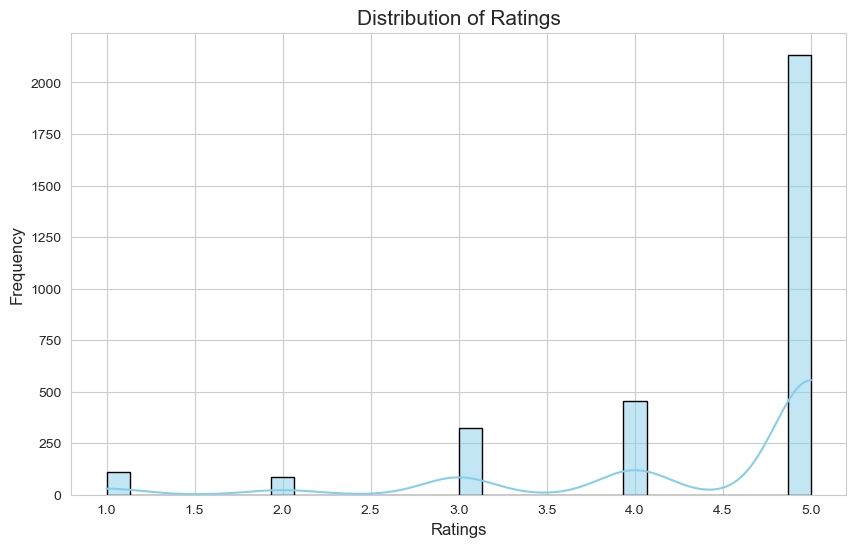

In [113]:
# Plot the distribution of the ratings

# Assuming 'data.overall' contains the ratings
ratings = data.overall

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram combined with a KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=30, kde=True, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

Number of empty reviews: 16


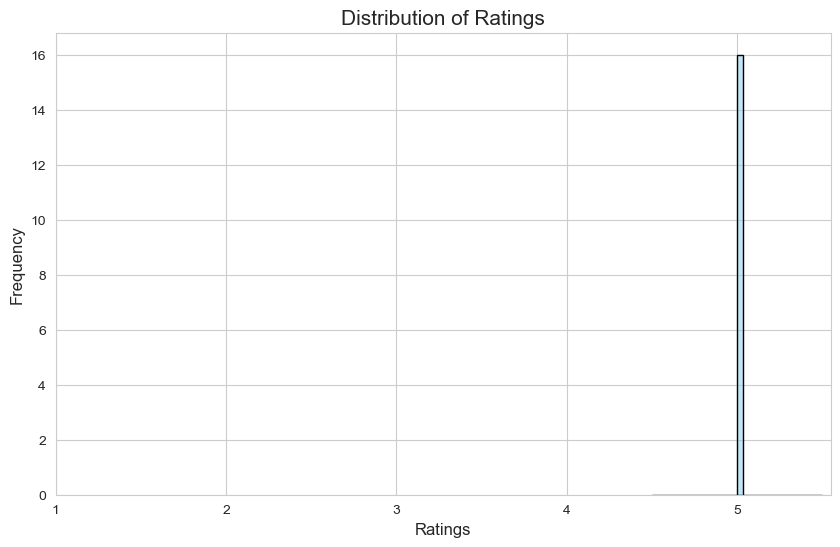

In [114]:
# plot the distribution of the ratings with respect to empty reviews, so na values
ratings_na = data[data.reviewText.isna()].overall

print(f"Number of empty reviews: {len(ratings_na)}")

# Create a histogram combined with a KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(ratings_na, bins=30, kde=True, color='skyblue', edgecolor='black')

# set the xticks to be the ratings 1 to 5
plt.xticks(np.arange(1, 6, 1))
# Adding titles and labels
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


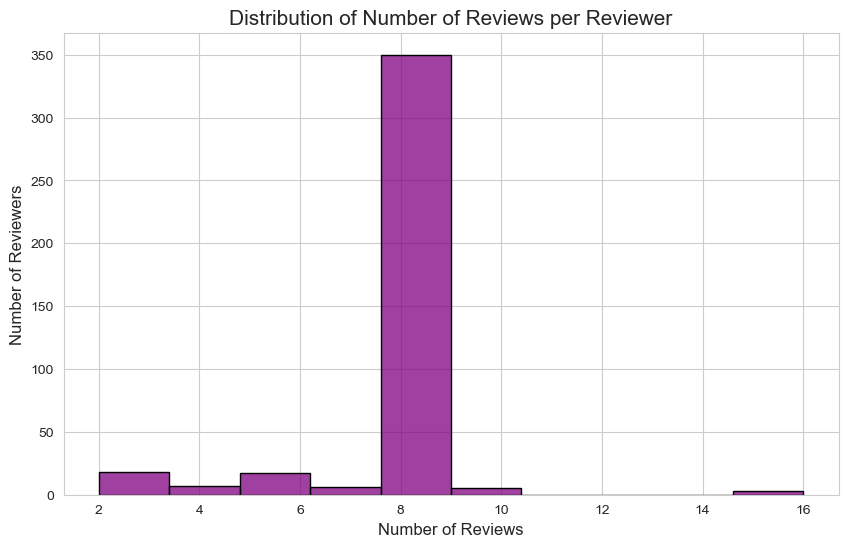

In [115]:
# plot the distribution of the how many reviews each reviewer has written
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.reviewerID.value_counts()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(reviewers, kde=False, color='purple', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Number of Reviews per Reviewer', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Number of Reviewers', fontsize=12)

# Show the plot
plt.show()

In [116]:
# set the len of na values to an epmty string
data.reviewText = data.reviewText.fillna('') 
# print the average, max, and min length of the reviews
review_lengths = [len(t) for t in data['reviewText']]
print(f"Average length of text: {np.mean(review_lengths)}")
print(f"Max length of text: {np.max(review_lengths)}")
print(f"Min length of text: {np.min(review_lengths)}")

# Distribution of review lengths

Average length of text: 132.1682754182754
Max length of text: 1366
Min length of text: 0


<Axes: ylabel='Count'>

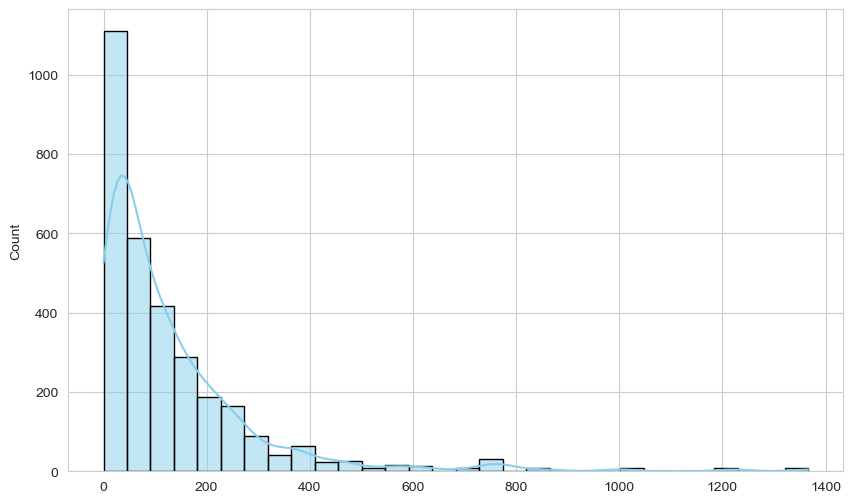

In [117]:
# plot the distribution of the review lengths
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=30, kde=True, color='skyblue', edgecolor='black')


<Axes: xlabel='overall', ylabel='Count'>

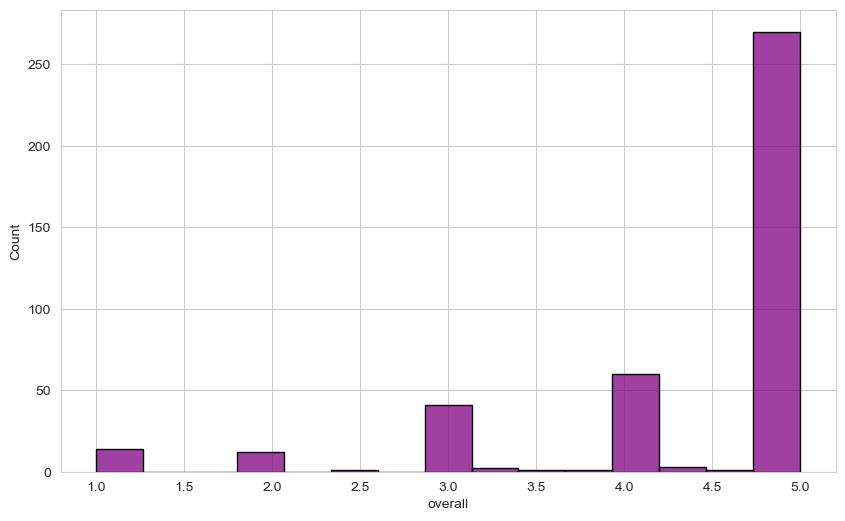

In [118]:
#plot the average rating for each individual reviewer
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.groupby('reviewerID').overall.mean()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(reviewers, kde=False, color='purple', edgecolor='black')



Text(0, 0.5, 'Ratings')

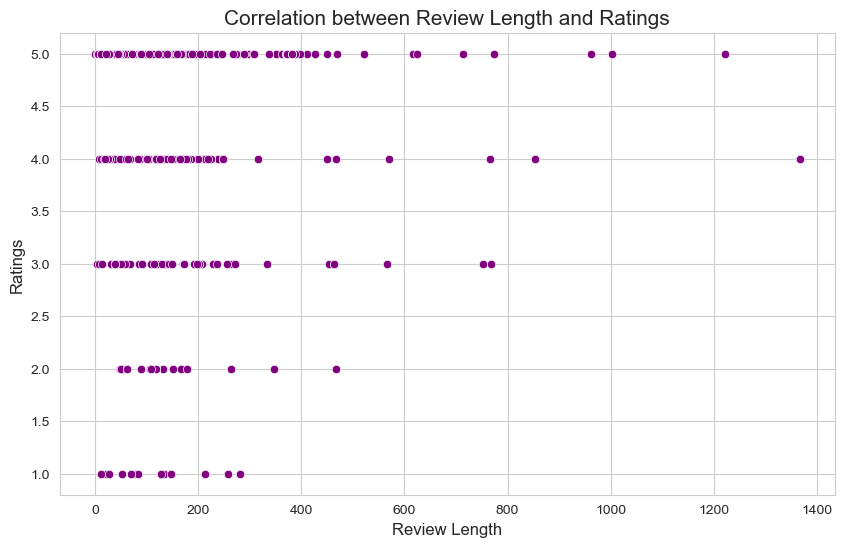

In [119]:
# look for any correlation between the length of a review and its rating

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=review_lengths, y=ratings, color='purple')

# Adding titles and labels
plt.title('Correlation between Review Length and Ratings', fontsize=15)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Ratings', fontsize=12)

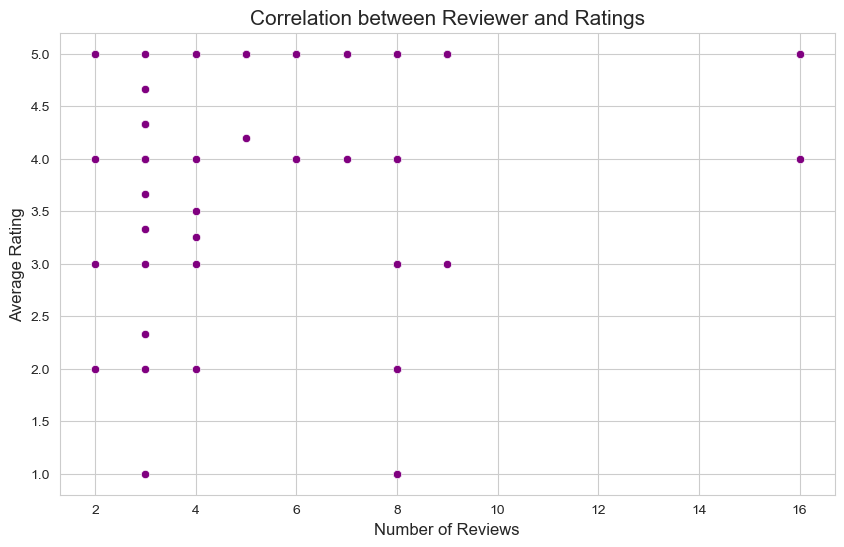

In [120]:
# plot the correlation between the number of reviews a reviewer has written and the average rating of their reviews
# Assuming 'data.reviewerID' contains the reviewerID
reviewers = data.groupby('reviewerID').overall.agg(['mean', 'count'])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reviewers['count'], y=reviewers['mean'], color='purple')

# Adding titles and labels
plt.title('Correlation between Reviewer and Ratings', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.show()



4. Frequency Analysis of words and characters

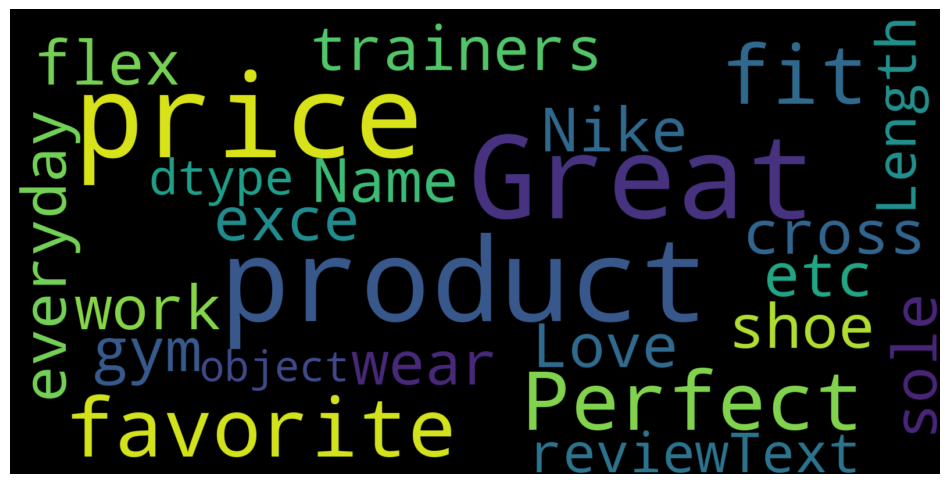

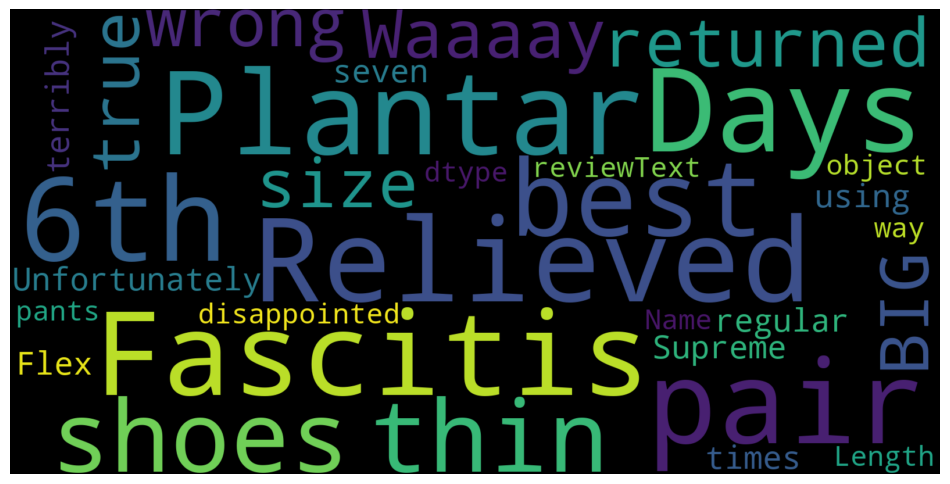

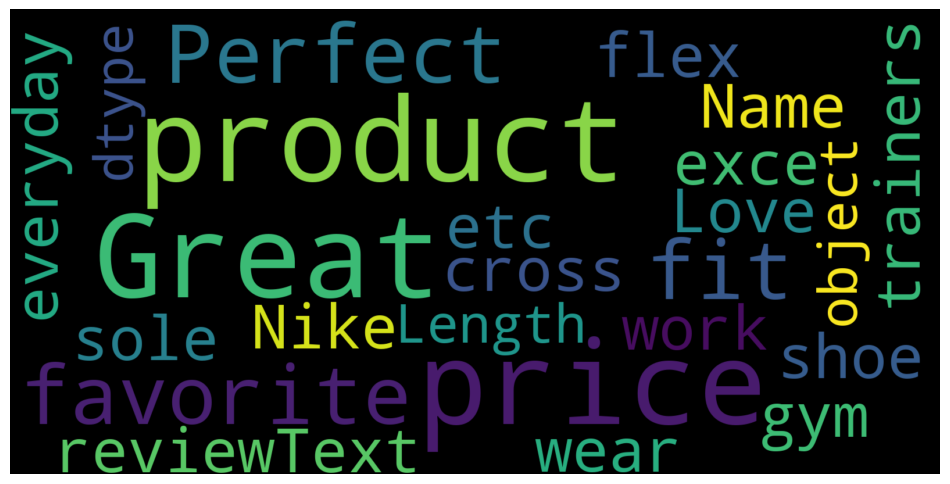

In [121]:
# word clouds or frequency histograms to identify the most frequent words and characters in the reviews

# import the wordcloud package
from wordcloud import WordCloud

# create a wordcloud of the reviews
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(data.reviewText))

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# create a wordcloud of the reviews with the ratings less than or equal to 2
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(data[data.overall <= 2].reviewText))

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# create a wordcloud of the reviews with the ratings greater than or equal to 4
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(data[data.overall >= 4].reviewText))

# plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


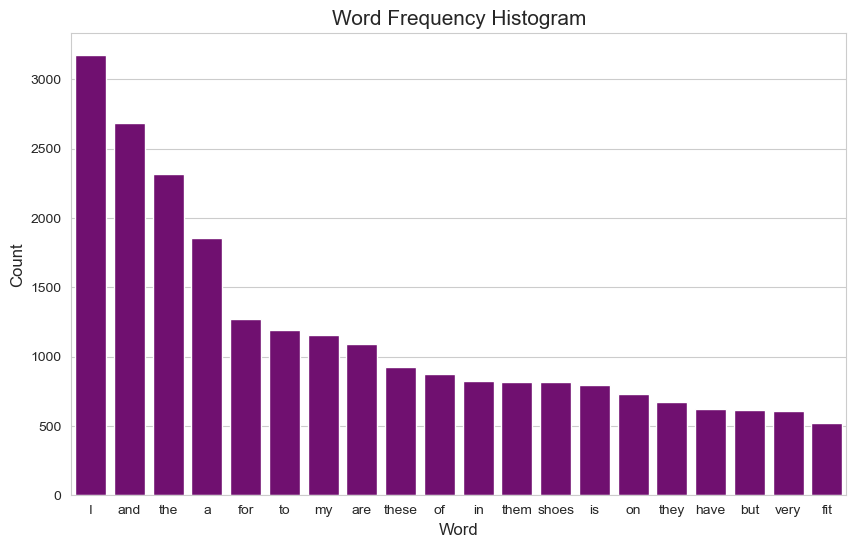

In [122]:
# word frequency histograms
from collections import Counter

# create a list of words
words = data.reviewText.str.split(expand=True).unstack().value_counts()

# create a dataframe with words and their counts
words_df = pd.DataFrame(words).reset_index()
words_df.columns = ['word', 'count']

# plot the word frequency histogram for the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=words_df.head(20), color='purple')

# Adding titles and labels
plt.title('Word Frequency Histogram', fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

# this could speak for removing stopwords

Text(0.5, 0, 'Word')

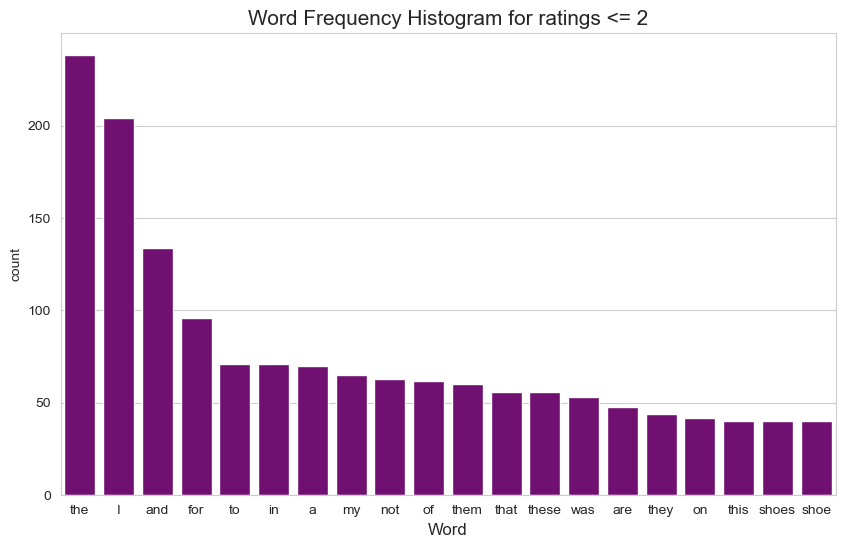

In [123]:
# plot the word frequency histogram for the top 20 words with ratings less than or equal to 2
# ratings less than or equal to 2
ratings_2 = data[data.overall <= 2].reviewText.str.split(expand=True).unstack().value_counts()

# create a dataframe with words and their counts
ratings_2_df = pd.DataFrame(ratings_2).reset_index()
ratings_2_df.columns = ['word', 'count']

# plot the word frequency histogram for the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=ratings_2_df.head(20), color='purple')

# Adding titles and labels
plt.title('Word Frequency Histogram for ratings <= 2', fontsize=15)
plt.xlabel('Word', fontsize=12)


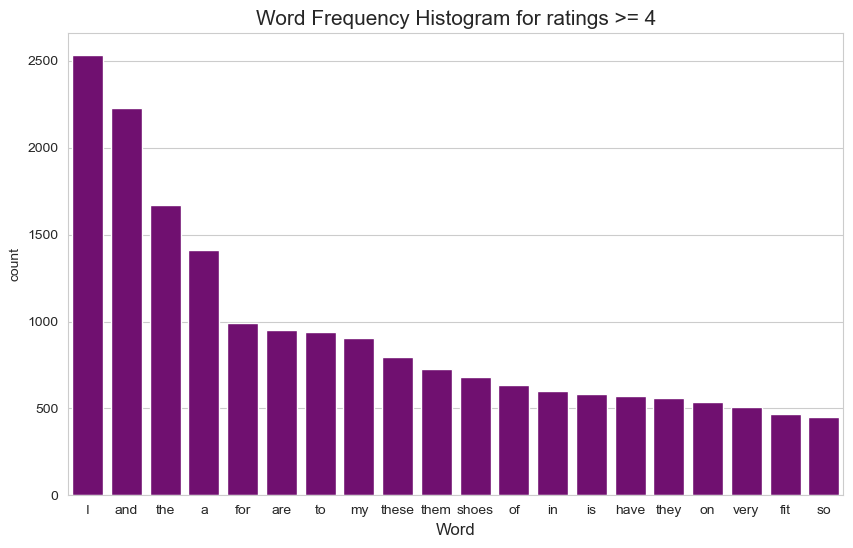

In [124]:
# plot the word frequency histogram for the top 20 words with ratings greater than or equal to 4
# ratings greater than or equal to 4
ratings_4 = data[data.overall >= 4].reviewText.str.split(expand=True).unstack().value_counts()

# create a dataframe with words and their counts
ratings_4_df = pd.DataFrame(ratings_4).reset_index()
ratings_4_df.columns = ['word', 'count']

# plot the word frequency histogram for the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=ratings_4_df.head(20), color='purple')

# Adding titles and labels
plt.title('Word Frequency Histogram for ratings >= 4', fontsize=15)
plt.xlabel('Word', fontsize=12)

# Show the plot
plt.show()


Could Analysis of review summaries - simalar to 2-4

remove stop words excluding the word not 

In [125]:
# # remove stopwords from the reviews, excluding the word "not" from the stopwords list

# # import the stopwords library
# from nltk.corpus import stopwords

# # download the stopwords
# import nltk
# nltk.download('stopwords')

# # create a set of stopwords
# stop_words = set(stopwords.words('english'))
# # remove the word 'not' from the set of stopwords
# stop_words.remove('not')

# # remove stopwords from the reviews
# data['reviewText'] = data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


# # print the first 5 rows of the column 'reviewText'
# data['reviewText'].head()

In [126]:
# # plot word frequency histograms for the top 20 words after removing stopwords
# # create a list of words
# words = data.reviewText.str.split(expand=True).unstack().value_counts()

# # create a dataframe with words and their counts
# words_df = pd.DataFrame(words).reset_index()
# words_df.columns = ['word', 'count']

# # plot the word frequency histogram for the top 20 words
# plt.figure(figsize=(10, 6))
# sns.barplot(x='word', y='count', data=words_df.head(20), color='purple')

# # Adding titles and labels
# plt.title('Word Frequency Histogram', fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('Count', fontsize=12)

# # Show the plot
# plt.show()

7. Insights and Patterns

8. Selection of Training and Validation Sets
- including rationalization for dataset choices

In [ ]:
# have already removed the duplicates

# remove the revies that have empty text
data = data[~data.reviewText.isna()]
# remove the reviews that are not verified purchases
data = data[data.verified == True]